# **Imágenes Satelitales con SDR - Módulo I**

**Objetivo:**

En este primer módulo el objetivo es  estudiar los satélites con los que trabajaremos durante todo el proyecto, los satélites NOAA 15,18 y 19, y la forma que tienen para enviar las imagenes a tierra.

*  En la primera sección buscaran información sobre estos satélite, que tipos de imagenes envian y que sensores utilizan para esto.

*  En la segunda sección trabajaremos con las señales APT. Estas son la forma que tienen los satélites para codificar una imagen como una señal análogica.

*  Por último, en la tercera sección estudiamos como modulan y transmiten esta señales analogicas los satelites.


## **1. Satélites NOAA**



En este proyecto trabajaremos con los satélites meterológicos NOAA 15, 18 y 19 de la serie Tyros - N. La razón de trabajar con estos satélites es que transmisten una señal en la banda VHF (Very High Frequency, 30~300 MHz) que es fácil de captar con equipos sencillos de radiocomunicaciones, como por ejemplo mediante el RTL-SDR y una antena casera.

Los siguientes dos ejercicios tiene como finalidad que busquen información sobre los satelites NOAA y el sensor AVHRR. Esta información debe ser agregadas al fundamento teórico del informe final.

### Ejercicio 1 - Satélites NOAA


Investigue sobre los satélites meteorológicos de la **serie NOAA 15, 18 y 19.**


* ¿Cuándo fueron lanzados?
*   ¿Qué tipo de orbita sigue?
*   ¿Cuánto tiempo demoran en dar una vuelta completa?
* ¿Qué tipo de información monitorean?
* ¿Qué diferencias presentan entre modelos?
* ¿En que frecuencia trabajan?
* ¿Qué ancho de banda tienen?

Estas preguntas sirven como disparadoras, pero buscar toda información que le parezca relvante.

### Ejercicio 2 - Instrumentos de observación


Los satélites de observación disponen de varios sensores que pueden estudiar partes específicas del espectro electromagnético. En particular los satélites NOAA 15/18/19 cuentan con un radiómetro denominado AVHRR.

**Busque información sobre el AVHRR**


*   ¿Qué mide este instrumento?
*   ¿Cuáles son sus aplicaciones?





### Referencias


Algunas referencias utiles para los ejercicios anteriores son:
-  "Construcción y operación de estación terrena para el seguimiento de satélites", documentación del proyecto de fin de carrera de Ingeniería Eléctrica de los estudiantes Joaquín Gayoso, Damián Melgarejo, Gabriela Mullukian, 2019. Disponible en: [https://iie.fing.edu.uy/publicaciones/2019/GMM19/](https://iie.fing.edu.uy/publicaciones/2019/GMM19/)
- Guía NOAA (en inglés): [https://noaasis.noaa.gov/NOAASIS/pubs/Users_Guide-Building_Receive_Stations_March_2009.pdf](https://noaasis.noaa.gov/NOAASIS/pubs/Users_Guide-Building_Receive_Stations_March_2009.pdf)
- Guía detallada NOAA KLM (en inglés): [http://webapp1.dlib.indiana.edu/virtual_disk_library/index.cgi/2790181/FID1497/klm/html/c4/sec4-2.htm#t422-1](http://webapp1.dlib.indiana.edu/virtual_disk_library/index.cgi/2790181/FID1497/klm/html/c4/sec4-2.htm#t422-1)

A su vez se incluyen algunos videos en el final del notebook sobre la historia de los satélites los cuales son interesantes de ver.

## **2. Señal APT**


### Estructura de la señal APT

Los satélites NOAA transmiten una señal analógica denominada APT (Automatic Picture Transmission). Esta señal puede ser agrupada en frames, donde cuando un frame termina de ser enviado comienza el siguiente frame a ser enviado. Un frame APT esta compuesto por dos imagenes, denominados canal A y canal B, a los cuales se les agrega campos de sincronización y telemetría.

Si bien el radiómetro AVHRR cuenta con 6 canales, en el modo APT solo se transmiten dos de ellos en simultáneo, denominados canal A y canal B. Los canales que se muestran son seleccionados por el centro de control de NOAA. Típicamente se muestra el canal visible si es de día y un canal infrarrojo, y si es de noche se muestran dos canales infrarrojos. A los canales se le agrega campos de sincronización y telemetría, y con esto se obtiene el frame (o cuadro) APT que se muestra en la Figura 1.

<center>
    <img src="https://iie.fing.edu.uy/~gbelcredi/tallerineImSat/fig/imagenAPT.png" width="600">
    <figcaption>Figura 1: Frame APT</figcaption>
</center>

Los campos de sincronización, que se ven como barras verticales en la imagen anterior, permiten alinear la imagen y corregir el efecto Doppler como veremos más adelante. En el campo de telemetría hay información necesaria para calibrar la imagen (recuperar los valores de gris originales y que fueron escalados durante la transmisión), datos de temperatura del satélite y los tipos de canal que se muestran. La estructura de la imagen APT se muestra en la Figura 2.

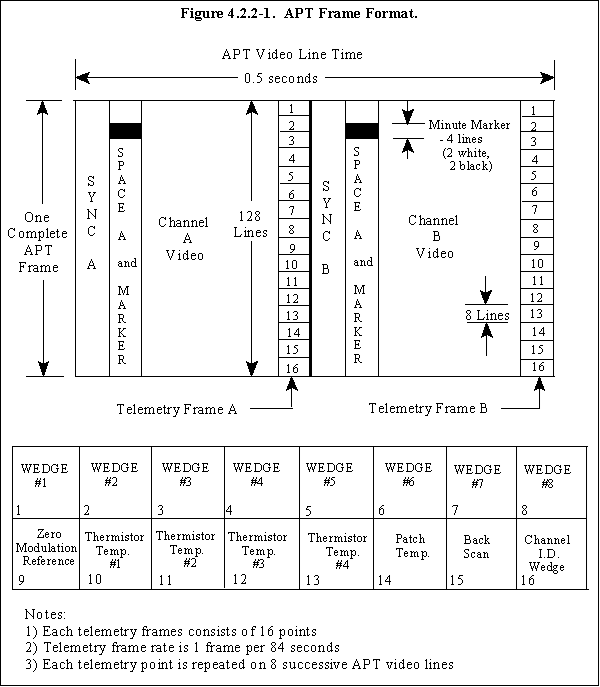



En la [Guía NOAA](https://noaasis.noaa.gov/NOAASIS/pubs/Users_Guide-Building_Receive_Stations_March_2009.pdf) puede encontrar información detallada sobre este sistema de transmisión.

La imagen (o matriz) luego se serializa pasando de un objeto de dos dimensiones a un vector unidimensional, para esto se concatenan las filas de la imagen denominadas «líneas de video APT». Cada línea de video APT se compone de 2080 muestras de 8 bits y se transmite en un tiempo de 0,5s. Es decir que la tasa de muestras es de $\frac{2080 \text{ muestras}}{0.5 s} = 4160$ mps (muestras por segundo). La codificación de 8 bits sin signo permite representar números enteros entre 0 y 255, donde 0 se corresponde al negro y 255 al blanco. La siguiente imagen muestra la estructura de una línea de la señal APT


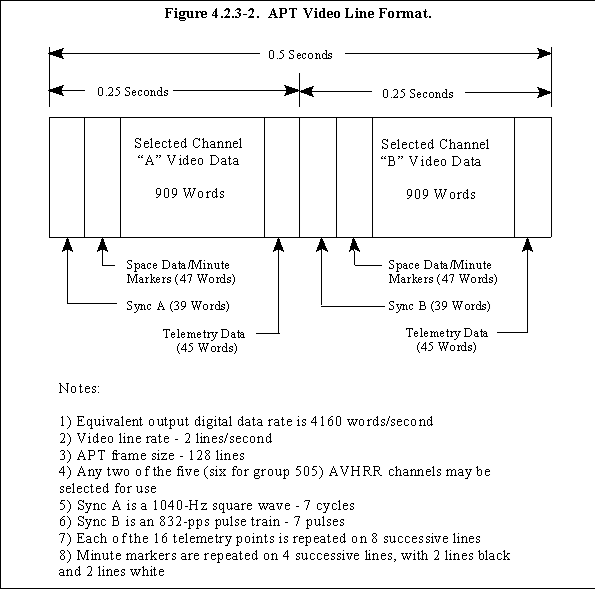




### Viendo una señal APT real

Con el siguiente comando descargaremos un archivo .wav que contiene una señal APT ya demodulada:


In [ ]:
!wget https://iie.fing.edu.uy/~gbelcredi/tallerineImSat/wav/am/apt.wav

--2024-05-15 20:31:37--  https://iie.fing.edu.uy/~gbelcredi/tallerineImSat/wav/am/apt.wav
Resolving iie.fing.edu.uy (iie.fing.edu.uy)... 164.73.32.20
Connecting to iie.fing.edu.uy (iie.fing.edu.uy)|164.73.32.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 967868 (945K) [audio/x-wav]
Saving to: ‘apt.wav’

apt.wav             100%[===================>] 945.18K  1.10MB/s    in 0.8s    

2024-05-15 20:31:39 (1.10 MB/s) - ‘apt.wav’ saved [967868/967868]



Ahora veamos como se ve la señal en diferentes escalas de tiempo...

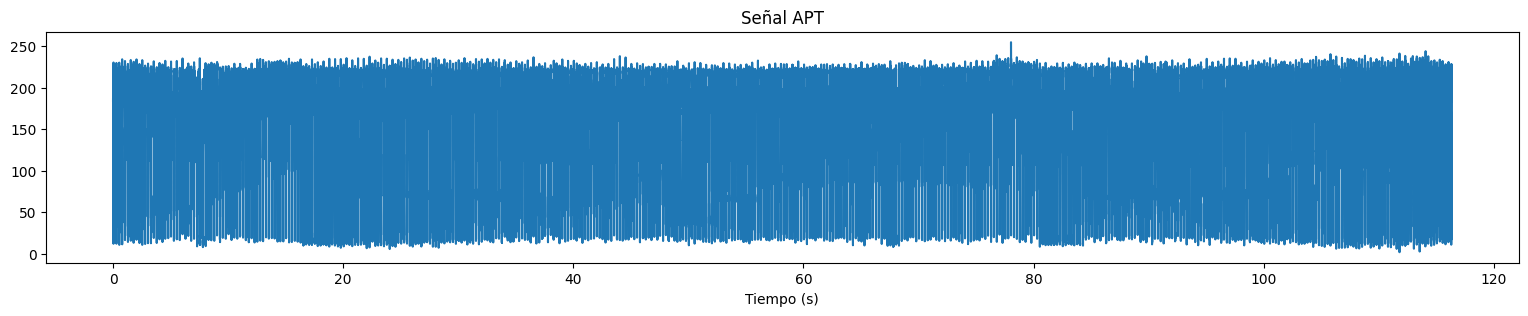

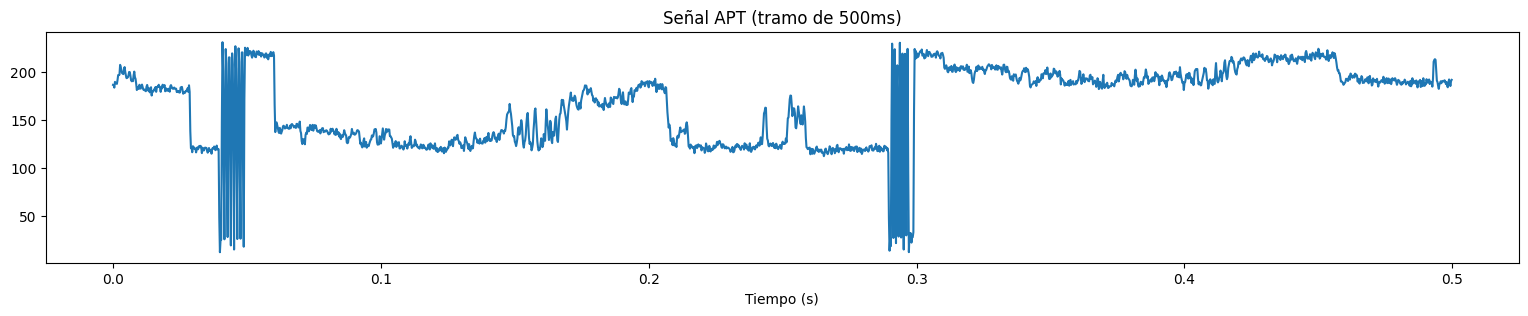

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow

import numpy as np
import scipy.io.wavfile as wav

# Leemos un archivo wav, y lo guardamos en data. Adicionalmente registramos la tasa de muestreo en rate.
rate, data = wav.read('apt.wav')
data = data / (2**16-1)
data = 255.*data/np.max(data)

# Creamos el vector de tiempo
t = np.linspace(0,len(data)/4160,len(data))

plt.figure()
plt.title('Señal APT')
plt.rcParams["figure.figsize"] = (19,3)
plt.plot(t,data)
plt.xlabel('Tiempo (s)')
plt.show()

plt.figure()
plt.title('Señal APT (tramo de 500ms)')
plt.plot(t[0:2080*1],data[0:2080*1]) # Nos quedamos con las primeras 2080 muestras
plt.xlabel('Tiempo (s)')
plt.savefig("grafica.png", dpi=150)
plt.show()



### Ejercicio 3 - Señal APT


Reutilizando el código de la parte anterior, intente encontrar en que muestra comienza la primera linea de la señal apt, y a partir de esto gráfique la primera línea completa.
Identifique que muestras conforman los campos SyncA, SyncB, Telemetria A y Telemetria B de esta linea. Grafique cada una.


In [ ]:
# COMPLETAR





El siguiente código permite generar una imagen en escala de grises a partir de una señal. Para las graficas obtenidas en la celda anterior (primera línea, Syncs y Telemetrias), observar como se ve su imagen en escala de grises.

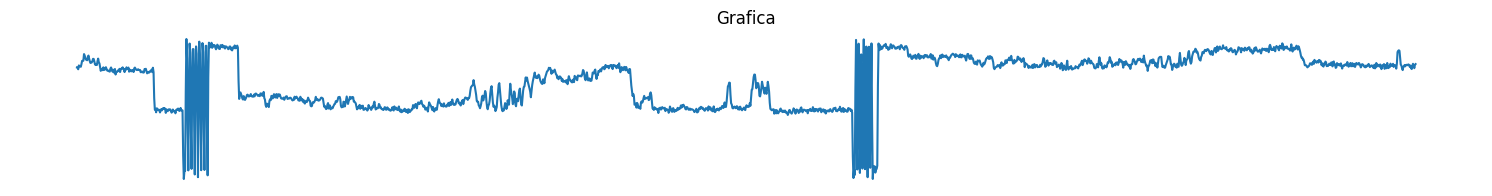

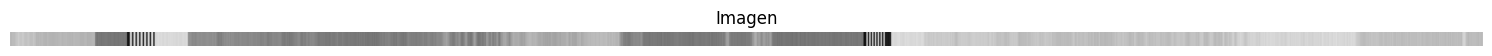

In [ ]:
# Señal a observar
primeras_2080_muestras = data[0:2080]


# Como grafica
plt.figure(figsize=(19,2))
plt.plot(primeras_2080_muestras)
plt.title('Grafica')
plt.axis('off')
plt.show()

# Como imagen
img = Image.fromarray(np.reshape(primeras_2080_muestras,(1,len(primeras_2080_muestras))))
plt.figure()
plt.rcParams["figure.figsize"] = (19,2)
plt.title('Imagen')
plt.axis('off')
imshow(img,cmap='gray',aspect=20.)
plt.show()


In [ ]:
# REPETIR PARA OTRA SEÑALES





## **3. Transmisión**


Una vez generada la señal APT debe prepararse para su transmisión, por un lado debe adecuarse a la porción de espectro asignada y por otro lugar debe poder resistir el ruido y la interferencia que pueda existir en el canal de comunicaciones.
La modulación en el sistema APT tiene la particularidad que combina dos modulaciones que vimos en el curso: FM y AM.


### Modulación AM


La primera etapa de modulación consiste en modular en amplitud (AM) una sinusoide de frecuencia $f_{p,am} = 2400 Hz$ con la señal APT $x_{apt}$, obteniendo $x_{am}$:

\begin{align}
x_{am}(t) &= x_{apt}(t).\cos(2\pi f_{p,am}t) \\
\end{align}

En la siguiente gráfica vemos que la señal AM generada es un tono de 2400Hz (en rojo) cuya amplitud queda delimitada por la señal APT (en verde).




### Modulación FM


En una segunda etapa se modula en frecuencia, en una portadora $f_{p,fm}$ alrededor de 137 MHz (cada satélite tiene su propia portadora) con frecuencia de desviación $f_\Delta = 17$ KHz.

\begin{align}
x_{fm}(t) &= A_m \cos \left(2 \pi f_{p,fm}t + 2\pi f_\Delta \int_{0}^{t}x_{am}(u)du\right)
\end{align}




### Diagrama de Transmisión

![APT FM FFT](https://iie.fing.edu.uy/~gbelcredi/tallerineImSat/fig/diagrama.png)

###  Diagrama de Recepción - Ejercicio 4

En base al diagrama del sistema de transmisión, realice un diagrama de bloques del sistema en recepción, desde la recepción en la antena de la señal $x_{fm}(t)$ hasta la obtención de la señal $x_{apt}(t)$.

Para esto, indique cada bloque como lo implementaría en python.

A su vez indique en la salida de cada bloque la expresión matématica de la señal resultante, indicando el ancho de banda de esa señal.  ¿Qué frecuencia de muestreo le parece adecuada al recibir la señal con el sdr?

Por último, explique con palabras como se podria recuperar la imagen a partir de la señal APT, y que problemas se pueden encontrar al tratar de implementar esto.


**ENTREGABLE INTERMEDIO:** Se deberá entregar los resultados de el ejercicio 4 para el próximo Miércoles 22 de Mayo a las 23:59 hs. Este es necesario para poder luego implementarlo en el taller 2.

## 4. Videos sobre Satelites



En esta sección se incluyen videos que ponen en contexto el origen de los satélites artificiales, cómo funcionan y cuáles son las diferentes aplicaciones de uso. Para correrlos primero ejecutar la siguiente celda:

In [ ]:
from IPython.display import HTML
from IPython.display import YouTubeVideo

### **¿Qué son y cómo funcionan los satélites artificiales?** - 10 min

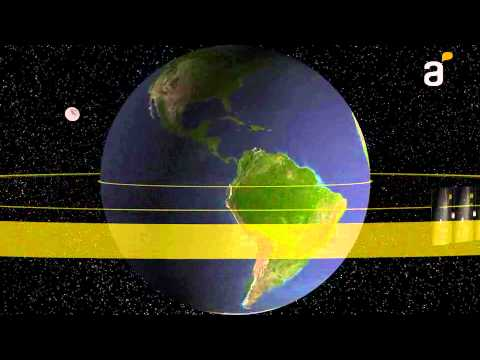

In [ ]:
YouTubeVideo('2GTR_Z-f27U',width=900,height=600)

### **Un poco de historia** - 20 min
*Historia de las Telecomunicaciones: los satélites.
Programa "Distancia Cero" canal Encuentro (Argentina)*

#### **Parte 1 - La ficción se vuelve realidad**

In [ ]:
HTML("""<video width="900" height="600" controls><source src="https://iie.fing.edu.uy/~gbelcredi/tallerineImSat/video/Distancia0_1.webm" type="video/webm"></video>""")

#### **Parte 2 - La carrera espacial**

In [ ]:
HTML("""<video width="900" height="600" controls><source src="https://iie.fing.edu.uy/~gbelcredi/tallerineImSat/video/Distancia0_2.webm" type="video/webm"></video>""")

#### **Parte 3 - Aplicaciones para meteorología y observación**

In [ ]:
HTML("""<video width="900" height="600" controls><source src="https://iie.fing.edu.uy/~gbelcredi/tallerineImSat/video/Distancia0_4.webm" type="video/webm"></video>""")

#### **Parte 4 - Conclusiones**

In [ ]:
HTML("""<video width="900" height="600" controls><source src="https://iie.fing.edu.uy/~gbelcredi/tallerineImSat/video/Distancia0_5.webm" type="video/webm"></video>""")

### El satélite uruguayo - 25 min

*Sobre Hombros de Gigantes (Ep.4 Temporada 1)*


In [ ]:
HTML("""<video width="900" height="600" controls><source src="https://iie.fing.edu.uy/~gbelcredi/tallerineImSat/video/ant3lsat.mp4" type="video/mp4"></video>""")